<b><font size=20, color='#A020F0'>MetPy

Hannah Zanowski<br>
11/18/24<br>

#### <span style="color:green">Learning Goals</span>
By the end of this notebook you will
1. Be able to read in GRIB files using xarray
2. Understand how to use Mety to do unit-aware calculations
3. Use MetPy to calculate and plot various quantities relevant to synoptic meteorology

#### Resources
[MetPy Documentation](https://unidata.github.io/MetPy/latest/userguide/index.html)<br>
[MetPy API reference](https://unidata.github.io/MetPy/latest/api/index.html)<br>
[Unidata's MetPy Mondays](https://www.unidata.ucar.edu/blogs/news/entry/metpy-mondays)

#### Acknowledgements
Major thanks to [Andrew Winters](https://acwinters.weebly.com/) (a UW-Madison PhD graduate!) for providing sample notebooks that helped me create the content for this lecture and this week's in-class exercises. Some lecture content is also heavily borrowed from the MetPy [getting started guide](https://unidata.github.io/MetPy/latest/userguide/startingguide.html).

# A little about MetPy

MetPy is a package used for manipulating and visualizing meteorological data. It has a number of really useful built-in functions for calculating meteorological variables and a lot of support for creating nice weather maps. It also has a number of [features similar to GEMPAK](https://unidata.github.io/MetPy/latest/userguide/gempak.html), the set of which will likely grow as MetPy development continues. It also works well with xarray!

---

Let's begin by importing a few packages that we need (we'll import stuff from MetPy later):

In [4]:
import xarray as xr
import numpy as np
import cfgrib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## 1. "Fun" with the GRIB file format
[GRIB](https://confluence.ecmwf.int/display/CKB/What+are+GRIB+files+and+how+can+I+read+them) files are a type of file developed by the World Meteorological Organization for transferring large streams of meteorological data, especially from weather forecasting systems. While the format is good at what it is designed for, it is much worse when utilized as a format for data storage and access. Nevertheless, the WMO seems to want to keep the grib format around, and if you've worked with any kind of forecasting data that isn't nicely packaged as netcdf files, there's a good chance you've come across the GRIB format, and you probably dislike it.

### Reading in GRIB files with xarray
Thankfully, we can usually read in grib files using xarray! All we need to do is specify the `'engine'` keyword so that `open_dataset()` knows we have a grib file. Let's try it below on a single GRIB file from the [Climate Forecast System Reanalysis](https://climatedataguide.ucar.edu/climate-data/climate-forecast-system-reanalysis-cfsr) (CFSR).

><b><font color='red'>Note:</font></b> Sometimes xarray doesn't quite work for reading GRIB files. When that happens, you might want to switch to using the [pygrib](https://pypi.org/project/pygrib/) package instead (pygrib is not currently in our class environment). Metpy Mondays has an example video for [reading GRIB files with pygrib](https://www.unidata.ucar.edu/blogs/developer/en/entry/metpy-mondays-135-reading-grib).

In [5]:
#Read in grib
path='/share/Lecture_data/'
ds=xr.open_dataset(path+'pgbh06.gdas.1997033112.grb2',engine='cfgrib')

DatasetBuildError: multiple values for unique key, try re-open the file with one of:
    filter_by_keys={'typeOfLevel': 'meanSea'}
    filter_by_keys={'typeOfLevel': 'isobaricInhPa'}
    filter_by_keys={'typeOfLevel': 'heightAboveGround'}
    filter_by_keys={'typeOfLevel': 'surface'}
    filter_by_keys={'typeOfLevel': 'atmosphereSingleLayer'}
    filter_by_keys={'typeOfLevel': 'heightAboveGroundLayer'}
    filter_by_keys={'typeOfLevel': 'tropopause'}
    filter_by_keys={'typeOfLevel': 'maxWind'}
    filter_by_keys={'typeOfLevel': 'heightAboveSea'}
    filter_by_keys={'typeOfLevel': 'isothermZero'}
    filter_by_keys={'typeOfLevel': 'highestTroposphericFreezing'}
    filter_by_keys={'typeOfLevel': 'pressureFromGroundLayer'}
    filter_by_keys={'typeOfLevel': 'sigmaLayer'}
    filter_by_keys={'typeOfLevel': 'sigma'}
    filter_by_keys={'typeOfLevel': 'potentialVorticity'}
    filter_by_keys={'typeOfLevel': 'depthBelowLandLayer'}
    filter_by_keys={'typeOfLevel': 'nominalTop'}
    filter_by_keys={'typeOfLevel': 'highCloudLayer'}
    filter_by_keys={'typeOfLevel': 'highCloudTop'}
    filter_by_keys={'typeOfLevel': 'highCloudBottom'}
    filter_by_keys={'typeOfLevel': 'middleCloudLayer'}
    filter_by_keys={'typeOfLevel': 'middleCloudTop'}
    filter_by_keys={'typeOfLevel': 'middleCloudBottom'}
    filter_by_keys={'typeOfLevel': 'lowCloudLayer'}
    filter_by_keys={'typeOfLevel': 'lowCloudTop'}
    filter_by_keys={'typeOfLevel': 'lowCloudBottom'}
    filter_by_keys={'typeOfLevel': 'convectiveCloudLayer'}
    filter_by_keys={'typeOfLevel': 'convectiveCloudTop'}
    filter_by_keys={'typeOfLevel': 'convectiveCloudBottom'}
    filter_by_keys={'typeOfLevel': 'boundaryLayerCloudLayer'}
    filter_by_keys={'typeOfLevel': 'hybrid'}

Yikes! Looks like that didn't quite work. That's because this particular grib file has multiple options for the vertical levels. At the end of the error message above, you can see all of the valid types of levels that you can provide as inputs to `open_dataset()` when using the cfgrib engine. Let's do what the error message tells us and use the `'filter_by_keys'` keyword to choose the type of vertical level that we want:

In [8]:
#Read in grib with filter_by_keys
ds=xr.open_dataset(path+'pgbh06.gdas.1997033112.grb2',engine='cfgrib',filter_by_keys={'typeOfLevel': 'isobaricInhPa'})

skipping variable: paramId==260018 shortName='clwmr'
Traceback (most recent call last):
  File "/opt/conda/envs/uw-fall-2024/lib/python3.11/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/opt/conda/envs/uw-fall-2024/lib/python3.11/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  875.,  850.,  825.,  800.,
        775.,  750.,  700.,  650.,  600.,  550.,  500.,  450.,  400.,
        350.,  300.,  250.,  225.,  200.,  175.,  150.,  125.,  100.,
         70.,   50.,   30.,   20.,   10.,    7.,    5.,    3.,    2.,
          1.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  875.,  850.,  825.,  800.,
        775.,  750.,  700.,  650.,  600.,  55

It doesn't look like it, but the data read-in actually worked. However, if you read the above warning messages, some variables were left out because they have different sets of levels associated with the `'isobaricInhPa'` level type, and xarray won't allow that. So to get around this, xarray leaves those data out. If you print your dataset below though, you can see that a lot of the data was read in correctly:

In [7]:
ds

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 37, latitude: 361, longitude: 720)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * latitude       (latitude) float64 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * longitude      (longitude) float64 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
    valid_time     datetime64[ns] ...
Data variables:
    gh             (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    r              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    w              (isobaricInhPa, latitude, longitude) float32 ...
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
    absv           (isobaricInhPa, latitude, longitude) float32 ...
    o3mr           (isobaricInhPa, latitude, longitude) float32 ...
    strf           (isobaricInhPa, latitude, longitude) float32 ...
    vp             (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2024-11-18T20:33 GRIB to CDM+CF via cfgrib-0.9.1...

This is fine, but how do we know what the full set of variables is in the grib file if we can't read them all in at once with xarray?

We can do this with [cfgrib](https://pypi.org/project/cfgrib/) instead, which will give us a list of the variables associated with each `'typeOfLevel'` in the grib file (which we specified with the `filter_by_keys` argument above when we read in our data).

><b><font color='red'>Note:</font></b> This takes a minute or so to run so we'll move on to metpy and then circle back

In [9]:
%%time
dsets=cfgrib.open_datasets(path+'pgbh06.gdas.1997033112.grb2')
dsets

CPU times: user 2.19 s, sys: 310 ms, total: 2.5 s
Wall time: 2.51 s


[<xarray.Dataset>
 Dimensions:                (latitude: 361, longitude: 720)
 Coordinates:
     time                   datetime64[ns] 1997-03-31T12:00:00
     step                   timedelta64[ns] 06:00:00
     atmosphereSingleLayer  float64 0.0
   * latitude               (latitude) float64 90.0 89.5 89.0 ... -89.5 -90.0
   * longitude              (longitude) float64 0.0 0.5 1.0 ... 358.5 359.0 359.5
     valid_time             datetime64[ns] 1997-03-31T18:00:00
 Data variables:
     r                      (latitude, longitude) float32 ...
     pwat                   (latitude, longitude) float32 ...
     tcc                    (latitude, longitude) float32 ...
     cwat                   (latitude, longitude) float32 ...
     cwork                  (latitude, longitude) float32 ...
     tozne                  (latitude, longitude) float32 ...
 Attributes:
     GRIB_edition:            2
     GRIB_centre:             kwbc
     GRIB_centreDescription:  US National Weather Service - 

---

## 2. MetPy
MetPy contains several modules that make up the package:
1. [Constants](https://unidata.github.io/MetPy/latest/api/generated/metpy.constants.html#module-metpy.constants)--a set of meteorologically relevant constants like the radius of the Earth and g.
2. [Units](https://unidata.github.io/MetPy/latest/api/generated/metpy.units.html#module-metpy.units)--MetPy uses [pint](https://pint.readthedocs.io/en/stable/) under the hood for unit-aware calculations.
3. [IO](https://unidata.github.io/MetPy/latest/api/generated/metpy.io.html#module-metpy.io)--contains functions and classes for reading in various file formats
4. [calc](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html#module-metpy.calc)--for calculating various dynamic and thermodynamic quantities!
5. [plots](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.html#module-metpy.plots)--for making plots like Hodographs and Skew-Ts
6. [plots.ctables](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.ctables.html#module-metpy.plots.ctables)--for working with colormaps and custom colormaps
7. [interpolate](https://unidata.github.io/MetPy/latest/api/generated/metpy.interpolate.html#module-metpy.interpolate)--various tools for data interpolation
8. [xarray](https://unidata.github.io/MetPy/latest/api/generated/metpy.xarray.html#module-metpy.xarray)--support for enhancing interoperability between metpy and xarray

Let's import a few of these:

In [10]:
import metpy.calc as mpcalc
import metpy.plots as mplots
from metpy.units import units

### MetPy and units
MetPy requires your data to have units in order to do unit-aware calculations, and it can get rage-y when it doesn't have them (see the [units tutorial](https://unidata.github.io/MetPy/latest/tutorials/unit_tutorial.html) for further info).

#### Adding units
You can add units to data by multiplying by the unit that you want:

In [11]:
Q_rate=2.5*units.joules/units.second
area=1*units.meters*units.meters #or 1*units('m^2')

In [12]:
Q_rate

<Quantity(2.5, 'joule / second')>

What is the type of these variables with units?

In [13]:
type(Q_rate)

pint.Quantity

Then you can do unit-aware calculations with the data:

In [14]:
#Calculate the heat flux
Qflux=Q_rate/area
Qflux

<Quantity(2.5, 'joule / second / meter ** 2')>

#### Converting units
You can convert units using `to()`, but in order for this to work properly your data must be a `pint.Quantity` type! Let's go through an example below:

In [15]:
#Set up some data
a=np.arange(0,10)*units.meter
a

Magnitude,[0 1 2 3 4 5 6 7 8 9]
Units,meter


In [16]:
#convert data to another unit
a=a.to('yard')
a

Magnitude,[0.0 1.0936132983377078 2.1872265966754156 3.2808398950131235 4.374453193350831 5.468066491688539 6.561679790026247 7.655293088363955 8.748906386701663 9.84251968503937]
Units,yard


In [17]:
#try using .to() on something that isn't a pint.Quantity type
np.arange(1,10).to('m')

AttributeError: 'numpy.ndarray' object has no attribute 'to'

You can also convert any units to SI units with `to_base_units()`:

In [18]:
a=a.to_base_units()
a

Magnitude,[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0]
Units,meter


#### Dealing with Temperature
Let's try to add two values that have units of ˚C:

In [19]:
10*units.degC+5*units.degC

OffsetUnitCalculusError: Ambiguous operation with offset unit (degree_Celsius, degree_Celsius). See https://pint.readthedocs.io/en/stable/user/nonmult.html for guidance.

You get an error because the ˚C scale is an offset (it's $T_{kelvin}-273.15K$), which can make operations like the one above ambiguous. 

---

#### <font color='blue'>Exercise for the class</font>
Write a few lines of code (really just show a quick example with math) demonstrating why the offset can make calculations with temperature ambiguous:

In [23]:
((10+273.15)+(5+273.15))*units.degK

<Quantity(561.3, 'kelvin')>

---

To avoid this error, you want to use the `delta_degC` unit when adding/subtracting temperatures in ˚C (or the `delta_degF`  unit when adding/subtracting temperatures in ˚F!). You can also just convert all your units to Kelvin, which doesn't have this problem ;)

In [25]:
10*units.degC+5*units.delta_degC

<Quantity(15, 'degree_Celsius')>

### Using xarray and metpy to read in data
I've saved some CFSR data as a netcdf file, which we'll use for the rest of the examples in this lecture. We can read in our netcdf data using xarray's `open_dataset`, but we need to use metpy to parse the metadata of the dataset so that it can keep track of the data's coordinate reference system (the projection the data are on!):

In [26]:
ds=xr.open_dataset('data/cfsr.CONUS.1997033112.nc').metpy.parse_cf()
ds

/tmp/ipykernel_451/1988851874.py:1: UserWarning: More than one time coordinate present for variable  "gh".
  ds=xr.open_dataset('data/cfsr.CONUS.1997033112.nc').metpy.parse_cf()


<xarray.Dataset>
Dimensions:        (latitude: 71, isobaricInhPa: 37, longitude: 181)
Coordinates:
  * latitude       (latitude) float64 20.0 20.5 21.0 21.5 ... 54.0 54.5 55.0
    time           datetime64[ns] 1997-03-31T12:00:00
    step           timedelta64[ns] 06:00:00
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * longitude      (longitude) float64 220.0 220.5 221.0 ... 309.0 309.5 310.0
    valid_time     datetime64[ns] 1997-03-31T18:00:00
    metpy_crs      object Projection: latitude_longitude
Data variables:
    gh             (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    r              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    w              (isobaricInhPa, latitude, longitude) float32 ...
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
    absv           (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2021-10-22T11:03 GRIB to CDM+CF via cfgrib-0.9.9...

### Selecting data
You can select data using xarray, or you can do it through metpy's xarray interface. However, if you want to keep track of units, then you want to use MetPy's `quantify()` method to add units to your dataset first. `quantify()` takes the units attribute of your data variables, and makes it part of the data itself:

In [27]:
ds=ds.metpy.quantify()

In [28]:
#Look at a single data variable
ds.t

Magnitude,[[[292.20001220703125 292.20001220703125 292.29998779296875 ... 294.1000061035156 293.79998779296875 293.70001220703125] [292.1000061035156 292.1000061035156 292.0 ... 294.20001220703125 293.8999938964844 293.6000061035156] [292.0 291.8999938964844 291.79998779296875 ... 294.0 293.6000061035156 293.1000061035156] ... [275.79998779296875 275.8999938964844 275.8999938964844 ... 269.5 269.6000061035156 269.6000061035156] [275.79998779296875 275.79998779296875 275.70001220703125 ... 269.1000061035156 269.29998779296875 269.3999938964844] [275.70001220703125 275.6000061035156 275.3999938964844 ... 268.70001220703125 268.8999938964844 269.1000061035156]] [[290.1000061035156 290.20001220703125 290.20001220703125 ... 292.0 291.70001220703125 291.6000061035156] [290.0 290.0 290.0 ... 292.1000061035156 291.79998779296875 291.5] [289.8999938964844 289.79998779296875 289.70001220703125 ... 291.8999938964844 291.5 291.0] ... [273.79998779296875 273.8999938964844 273.8999938964844 ... 267.5 267.6000061035156 267.6000061035156] [273.79998779296875 273.79998779296875 273.79998779296875 ... 267.20001220703125 267.29998779296875 267.5] [273.70001220703125 273.6000061035156 273.3999938964844 ... 266.79998779296875 266.8999938964844 267.1000061035156]] [[288.1000061035156 288.1000061035156 288.1000061035156 ... 289.79998779296875 289.6000061035156 289.3999938964844] [287.8999938964844 287.8999938964844 287.79998779296875 ... 289.8999938964844 289.6000061035156 289.3999938964844] [287.79998779296875 287.6000061035156 287.6000061035156 ... 289.70001220703125 289.29998779296875 288.8999938964844] ... [271.79998779296875 271.8999938964844 271.79998779296875 ... 265.6000061035156 265.70001220703125 265.70001220703125] [271.79998779296875 271.79998779296875 271.70001220703125 ... 265.20001220703125 265.3999938964844 265.5] [271.6000061035156 271.5 271.3999938964844 ... 264.79998779296875 265.0 265.20001220703125]] ... [[259.79998779296875 259.8999938964844 259.8999938964844 ... 255.89999389648438 256.0 256.20001220703125] [259.79998779296875 259.8999938964844 259.8999938964844 ... 255.6999969482422 255.8000030517578 255.89999389648438] [259.79998779296875 259.79998779296875 259.79998779296875 ... 255.5 255.60000610351562 255.6999969482422] ... [255.0 254.89999389648438 254.8000030517578 ... 235.60000610351562 235.39999389648438 235.10000610351562] [255.1999969482422 255.10000610351562 255.0 ... 236.0 235.8000030517578 235.5] [255.39999389648438 255.3000030517578 255.1999969482422 ... 235.89999389648438 235.6999969482422 235.60000610351562]] [[262.79998779296875 263.0 263.20001220703125 ... 262.5 262.3999938964844 262.3999938964844] [262.5 262.70001220703125 262.8999938964844 ... 262.5 262.3999938964844 262.29998779296875] [262.29998779296875 262.5 262.70001220703125 ... 262.5 262.3999938964844 262.29998779296875] ... [260.1000061035156 259.8999938964844 259.6000061035156 ... 246.10000610351562 246.10000610351562 246.10000610351562] [260.0 259.70001220703125 259.5 ... 246.0 246.0 246.0] [259.8999938964844 259.6000061035156 259.3999938964844 ... 246.3000030517578 246.3000030517578 246.3000030517578]] [[258.3999938964844 258.6000061035156 258.8999938964844 ... 265.29998779296875 265.20001220703125 265.1000061035156] [258.5 258.70001220703125 258.8999938964844 ... 265.20001220703125 265.20001220703125 265.1000061035156] [258.6000061035156 258.70001220703125 259.0 ... 265.1000061035156 265.1000061035156 265.1000061035156] ... [264.29998779296875 264.5 264.6000061035156 ... 262.0 262.29998779296875 262.6000061035156] [264.70001220703125 264.79998779296875 264.8999938964844 ... 261.3999938964844 261.70001220703125 262.1000061035156] [265.0 265.1000061035156 265.20001220703125 ... 261.20001220703125 261.3999938964844 261.70001220703125]]]
Units,kelvin


Now let's get the zonal (u) and meridional (v) velocity at 500 hPa:

In [29]:
#pure xarray
uwnd=ds.u.sel(isobaricInhPa=500)
vwnd=ds.v.sel(isobaricInhPa=500)
hgt=ds.gh.sel(isobaricInhPa=500)

#metpy xarray interface
#uwnd=ds.u.metpy.sel(isobaricInhPa=500)
#vwnd=ds.v.metpy.sel(isobaricInhPa=500)
#hgt=ds.gh.metpy.sel(isobaricInhPa=500)

In [30]:
uwnd

Magnitude,[[10.9399995803833 11.34000015258789 11.869999885559082 ... 5.579999923706055 6.320000171661377 6.829999923706055] [10.15999984741211 10.789999961853027 11.569999694824219 ... 6.059999942779541 6.590000152587891 6.989999771118164] [9.260000228881836 9.90999984741211 10.59000015258789 ... 7.139999866485596 7.400000095367432 7.480000019073486] ... [26.850000381469727 24.90999984741211 23.209999084472656 ... 29.940000534057617 30.469999313354492 30.899999618530273] [22.84000015258789 21.260000228881836 19.829999923706055 ... 29.899999618530273 30.229999542236328 30.809999465942383] [18.920000076293945 17.56999969482422 16.25 ... 30.149999618530273 30.1299991607666 30.40999984741211]]
Units,meter/second


You can use built-in xarray plotting as well:

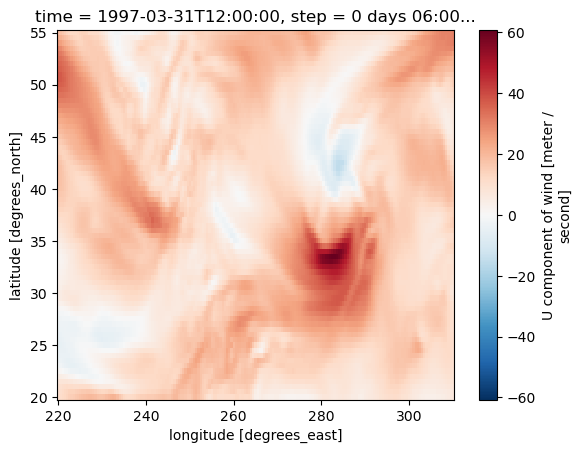

In [31]:
uwnd.plot()

### Calculations
[metpy.calc](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html#module-metpy.calc) has loads of useful functions that you can use to calculate dynamic and thermodynamic quantities. Some of these, like calculating derivatives, can be a pain normally, but MetPy makes it much easier!

Many of you will probably be happy to know that MetPy has a built-in function ([lat_lon_grid_deltas](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.lat_lon_grid_deltas.html#metpy.calc.lat_lon_grid_deltas)) to calculate grid cell lengths and widths in meters:

In [32]:
dx,dy = mpcalc.lat_lon_grid_deltas(ds.longitude, ds.latitude)

In [33]:
dx

Magnitude,[[52244.48202492069 52244.48202492069 52244.48202492069 ... 52244.48202492069 52244.48202492069 52244.48202492069] [52076.55289818885 52076.55289818885 52076.55289818885 ... 52076.55289818885 52076.55289818885 52076.55289818885] [51904.657927510954 51904.657927510954 51904.657927510954 ... 51904.657927510954 51904.657927510954 51904.657927510954] ... [32679.285748264447 32679.285748264447 32679.285748264447 ... 32679.285748264447 32679.285748264447 32679.285748264447] [32285.528179222594 32285.528179222594 32285.528179222594 ... 32285.528179222594 32285.528179222594 32285.528179222594] [31889.31196797296 31889.31196797296 31889.31196797296 ... 31889.31196797296 31889.31196797296 31889.31196797296]]
Units,meter


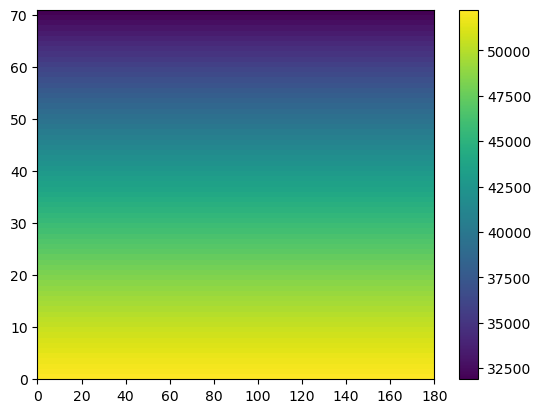

In [34]:
plt.pcolormesh(dx)
plt.colorbar()

#### Gradients
MetPy can also [compute gradients](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.gradient.html#metpy.calc.gradient). Let's compute dT/dy like we did in Homework 3.

><b><font color='red'>Note:</font></b> metpy's `gradient()` function returns a _tuple_ containing the computed gradient along each supplied axis!

In [35]:
dTdy=mpcalc.gradient(ds.t,axes='y')[0]

In [36]:
dTdy

<xarray.DataArray (isobaricInhPa: 37, latitude: 71, longitude: 181)>
<Quantity([[[-1.80672571e-06 -9.03466801e-07 -6.32260909e-06 ...  4.51650246e-06
    5.41948573e-06  1.80603430e-06]
  [-1.80662177e-06 -2.70988069e-06 -4.51633074e-06 ... -9.03154968e-07
   -1.80613825e-06 -5.41938179e-06]
  [-2.70972218e-06 -4.51596335e-06 -4.51596335e-06 ... -5.41916874e-06
   -8.12861527e-06 -9.93523808e-06]
  ...
  [-8.98562328e-07 -8.98411912e-07 -1.79654967e-06 ... -6.28878627e-06
   -3.59379806e-06 -1.79682382e-06]
  [-8.98063230e-07 -2.69488749e-06 -4.49171171e-06 ... -7.18674874e-06
   -6.28853602e-06 -4.49171176e-06]
  [-2.69433917e-06 -4.49101390e-06 -6.28878525e-06 ... -7.18615062e-06
   -8.08436334e-06 -6.28768862e-06]]

 [[-1.80672571e-06 -3.61345143e-06 -2.71046815e-06 ...  4.51650246e-06
    5.41865876e-06  1.80603430e-06]
  [-1.80662177e-06 -3.61324354e-06 -4.51622682e-06 ... -9.03154968e-07
   -1.80641391e-06 -5.41938179e-06]
  [-2.70944656e-06 -4.51596335e-06 -5.41927473e-06 ... -5.41916874e-06
   -7.22540988e-06 -9.03203269e-06]
...
  [-3.59382469e-06 -3.59367432e-06 -2.69526236e-06 ... -5.39094935e-06
   -5.39094935e-06 -6.28937457e-06]
  [-1.79682426e-06 -2.69503698e-06 -1.79682426e-06 ...  1.79638813e-06
    1.79638813e-06  1.79638813e-06]
  [-1.79667472e-06 -8.98462002e-07 -1.79667472e-06 ...  8.98356054e-06
    8.98356054e-06  8.98356054e-06]]

 [[ 1.80672571e-06  2.70998463e-06 -9.03258914e-07 ... -1.80589874e-06
    9.03258914e-07  8.67361738e-19]
  [ 1.80662177e-06  9.03362859e-07  9.03258914e-07 ... -1.80634610e-06
   -9.03258914e-07  0.00000000e+00]
  [ 2.70944656e-06  1.80613516e-06  1.80651679e-06 ... -9.03311403e-07
   -1.06014319e-10  9.03205389e-07]
  ...
  [ 6.28906043e-06  6.28893669e-06  5.39064856e-06 ... -9.88273475e-06
   -8.98417247e-06 -7.18719818e-06]
  [ 6.28868556e-06  5.39019861e-06  5.39019861e-06 ... -7.18704781e-06
   -8.08538513e-06 -8.08523564e-06]
  [ 4.49071482e-06  5.39029835e-06  5.39029835e-06 ...  1.14642327e-09
   -2.69511183e-06 -6.28766372e-06]]], 'kelvin / meter')>
Coordinates:
  * latitude       (latitude) float64 20.0 20.5 21.0 21.5 ... 54.0 54.5 55.0
    time           datetime64[ns] 1997-03-31T12:00:00
    step           timedelta64[ns] 06:00:00
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * longitude      (longitude) float64 220.0 220.5 221.0 ... 309.0 309.5 310.0
    valid_time     datetime64[ns] 1997-03-31T18:00:00
    metpy_crs      object Projection: latitude_longitude

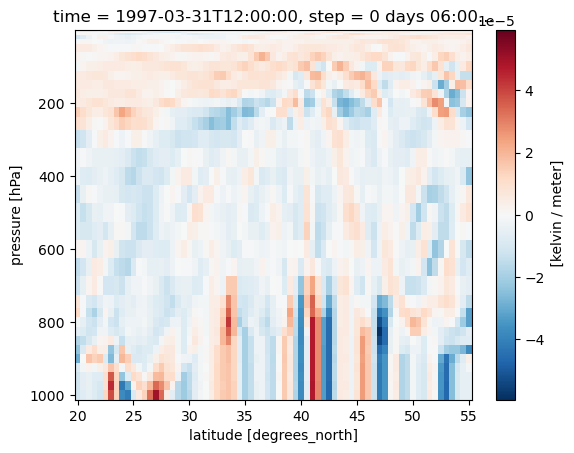

In [37]:
dTdy.sel(longitude=250).plot(yincrease=False)

#### Relative vorticity
The vertical component of the relative vorticity is <br>

$\zeta=\frac{\partial v}{\partial x}-\frac{\partial u}{\partial y}$

Calculating the [relative vorticity](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.vorticity.html#metpy.calc.vorticity) in MetPy is straightforward too, and it computes dx and dy under the hood for you if you use labeled xarray data: 

In [38]:
zeta=mpcalc.vorticity(uwnd,vwnd)

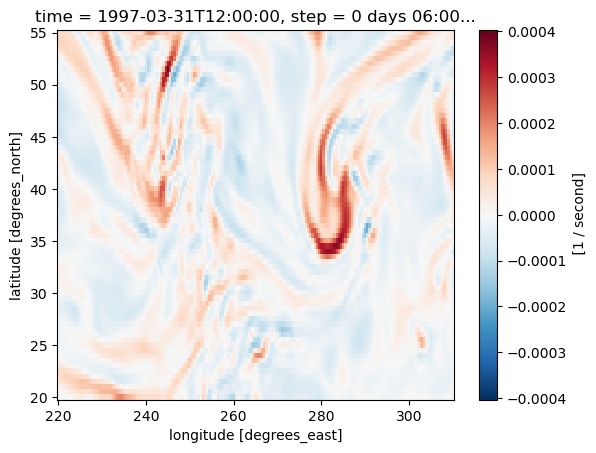

In [39]:
zeta.plot()

#### Smoothing
Smoothing is useful when your data are noisy. MetPy has a number of smoothing functions, but we'll use the [n-point smoother](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.smooth_n_point.html#metpy.calc.smooth_n_point) in this example. `smooth_n_point` takes three arguments:
1. The data to be smoothed
2. The number of points to use in smoothing (only 5 or 9 are valid for now)
3. The number of times the smoother is applied

In the example below we are using the 9-point option and are applying the smoother 10 times:

In [40]:
hgt_smoothed=mpcalc.smooth_n_point(hgt,9,10) #data, number of points for smoothing, # of times to smooth
uwnd_smoothed=mpcalc.smooth_n_point(uwnd,9,10)
vwnd_smoothed=mpcalc.smooth_n_point(vwnd,9,10)

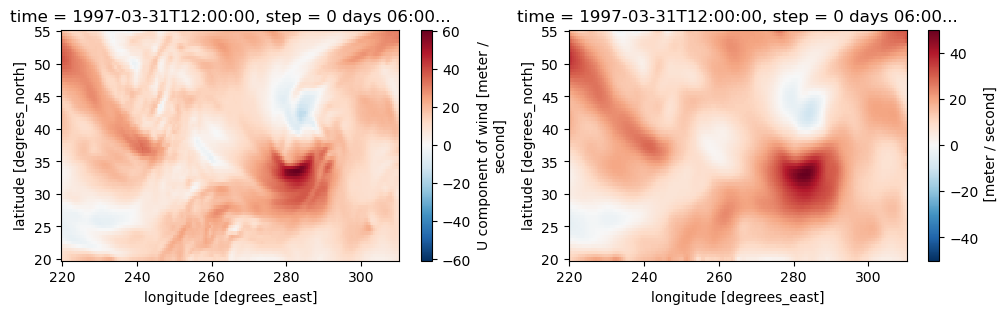

In [41]:
fig=plt.figure(figsize=(12,3))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
uwnd.plot(ax=ax1)
uwnd_smoothed.plot(ax=ax2)

### Making plots

#### Map plot example
Let's make a map of the 500 mbar geopotential height and the potential vorticity and winds at the same level. We'll be using cartopy to do this.
><b><font color='blue'>Note: </font></b> Here we're using matplotlibs [barbs](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.barbs.html) to add wind barbs to our plotting axis, but you can also use metpy's [BarbPlot()](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.BarbPlot.html).

First let's set up all the plotting parameters:

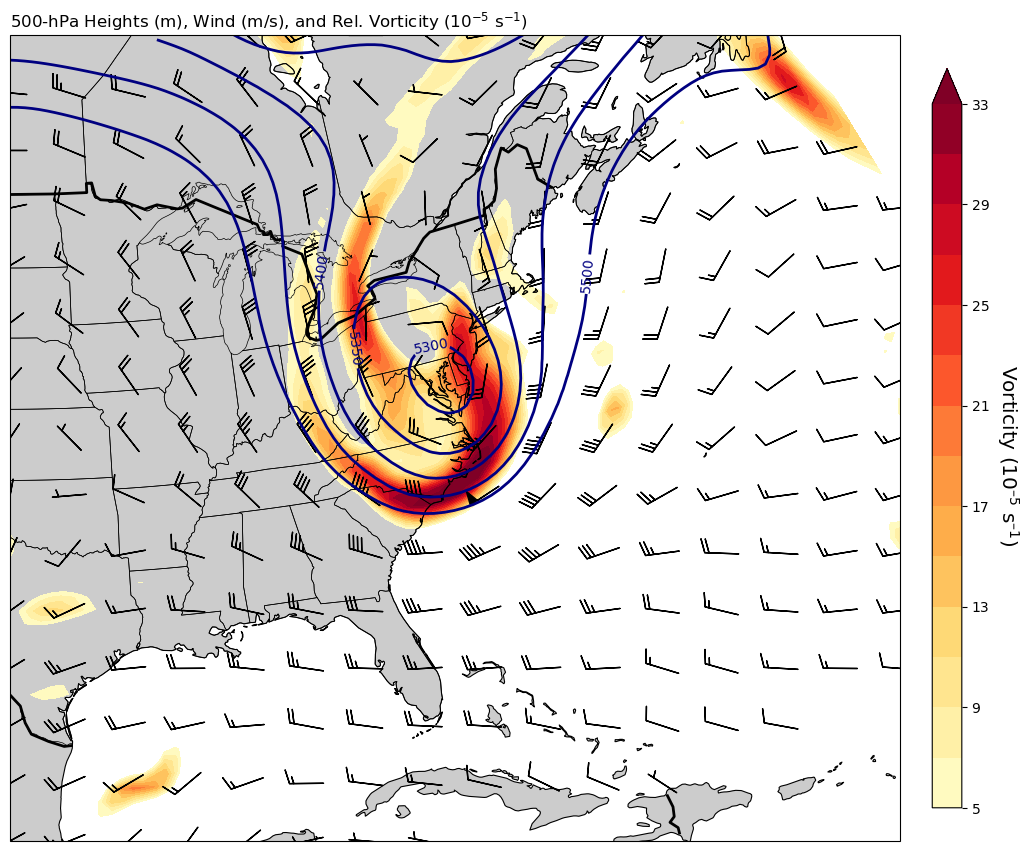

In [47]:
#Data projection and map projection
data_proj=ccrs.PlateCarree()
map_proj=ccrs.LambertConformal(central_longitude=-100,central_latitude=35, standard_parallels=(33, 45))

#Create the figure and add a subplot
fig = plt.figure(1, figsize=(14, 12))
ax = plt.subplot(111, projection=map_proj)
ax.set_extent([-100, -60, 22, 50], ccrs.PlateCarree()) #lat/lon bounds are [West,East,South,North]

# Add land, coastlines, and borders
ax.add_feature(cfeature.LAND, facecolor='0.8')
countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                       facecolor="none", name="admin_0_boundary_lines_land")
ax.add_feature(countries, linewidth=2, edgecolor="black")
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
ax.coastlines('50m', linewidth=0.8)

# Set up contour intervals
hgt_levs=np.arange(5000,5501,50)
zeta_levs=np.arange(5,35,2)

#Scale factor for the relative vorticity
scale=5

#########Make the plot
#Plot zeta (relative vorticity)
zeta_cs=ax.contourf(ds.longitude, ds.latitude, zeta*10**scale, levels=zeta_levs, 
                              cmap=plt.cm.YlOrRd, alpha=1, transform=data_proj,extend='max')
#Plot the geopotential height
gph_cs=plt.contour(ds.longitude, ds.latitude, hgt_smoothed, levels=hgt_levs, colors='navy', 
                   linewidths=2.0, transform=data_proj)
#label the contours
plt.clabel(gph_cs, fmt='%d')

# Plot wind barbs, regrid to reduce number of barbs
ax.barbs(ds.longitude, ds.latitude, uwnd_smoothed.values, vwnd_smoothed.values, pivot='middle',
         color='k', regrid_shape=15, transform=data_proj)

#Add the colorbar for zeta
cbar=plt.colorbar(zeta_cs, orientation='vertical', pad=0.03, aspect=25,shrink=0.8)
cbar.set_label('Vorticity (10$^{–5}$ s$^{–1}$)', size='x-large',rotation=270,va='bottom')

#Add a title
plt.title('500-hPa Heights (m), Wind (m/s), and Rel. Vorticity (10$^{-5}$ s$^{-1}$)', loc='left');

#### Skew-Ts
For this example let's choose a single grid cell and pretend like the data at this point is from an upper air sounding. You can read more about Skew-Ts [here](https://www.noaa.gov/jetstream/upperair/skew-t-log-p-diagrams)

In [48]:
temp=ds.t.sel(latitude=33,longitude=281) #choose a single lat/lon point for the temperature
p=ds.isobaricInhPa #pressure
rh=ds.r.sel(latitude=33,longitude=281) #relative humidity
u=ds.u.sel(latitude=33,longitude=281) #zonal velocity
v=ds.v.sel(latitude=33,longitude=281) #meridional velocity

#Calculate the dewpoint temperature
temp_dew=mpcalc.dewpoint_from_relative_humidity(temp,rh)

/opt/conda/envs/uw-fall-2024/lib/python3.11/site-packages/metpy/calc/thermo.py:1403: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/opt/conda/envs/uw-fall-2024/lib/python3.11/site-packages/metpy/calc/thermo.py:1404: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)


In [44]:
temp_dew.metpy.units

<Unit('degree_Celsius')>

Let's convert temperature to ˚C so we can compare it to the dewpoint temperature, which is also in ˚C. 

><b><font color='red'>Note:</font> When changing the units of a data array, we must use the metpy `convert_units()` method instead of `to()`:</b>

In [45]:
temp=temp.metpy.convert_units(units.degC) #convert to degC
temp

Magnitude,[13.45001220703125 11.25 9.050018310546875 6.95001220703125 4.850006103515625 2.550018310546875 0.350006103515625 -1.850006103515625 -3.949981689453125 -6.04998779296875 -7.75 -9.25 -9.949981689453125 -8.649993896484375 -9.649993896484375 -15.04998779296875 -22.149993896484375 -29.149993896484375 -34.75 -39.649993896484375 -47.25 -46.75 -46.44999694824219 -48.34999084472656 -53.54998779296875 -57.94999694824219 -61.25 -62.84999084472656 -60.25 -57.149993896484375 -54.54998779296875 -45.84999084472656 -39.649993896484375 -31.649993896484375 -19.349990844726562 -10.649993896484375 -9.04998779296875]
Units,degree_Celsius


Now let's make our Skew-T with the [SkewT](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html) plotting command. We'll also add a Hodograph as an inset using metpy's [Hodograph()](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.Hodograph.html) and matplotlib's [inset_axes()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.inset_axes.html):

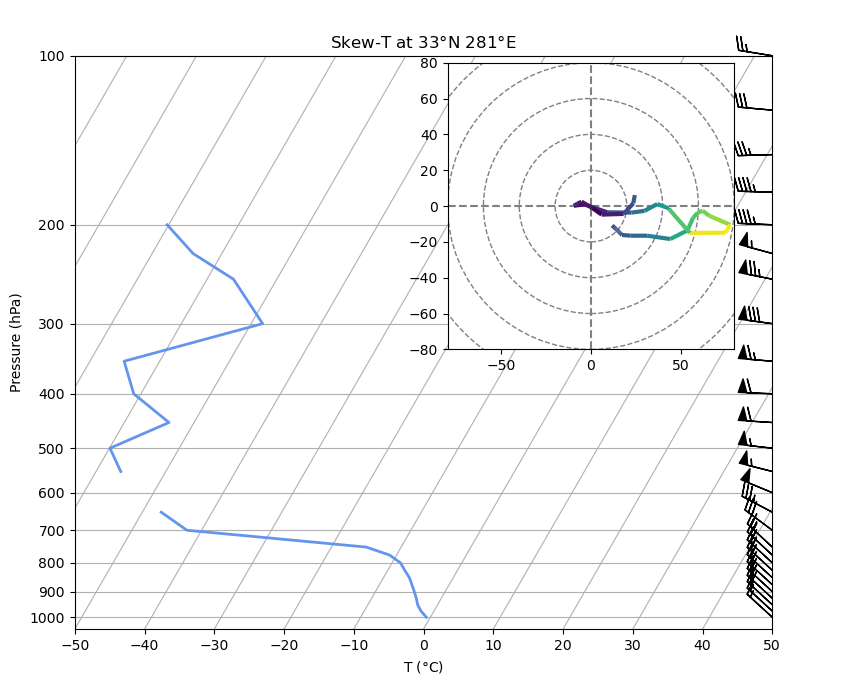

In [54]:
#Make the figure
fig=plt.figure(figsize=(9, 9))
#Set up the figure for plotting a skewT
skew=mplots.SkewT(fig)

#Plot the data
skew.plot(p, temp, 'darkorange', linewidth=2) #plot the air temperature
skew.plot(p, temp_dew, 'cornflowerblue', linewidth=2) #plot the dewpoint
skew.plot_barbs(p,u,v) #add wind barbs on the side
plt.gca().set_xlim(-50,50)
plt.title('Skew-T at {}$\degree$N {}$\degree$E'.format(33,281));
plt.xlabel('T ($\degree$C)');
plt.ylabel('Pressure (hPa)');

#add a hodograph
from mpl_toolkits.axes_grid1.inset_locator import inset_axes #for creating insets
#calculate windspeed
wspd=mpcalc.wind_speed(u,v)
axh=inset_axes(skew.ax, '50%', '50%', loc='upper right')
h=mplots.Hodograph(axh, component_range=80.)
h.add_grid(increment=20)
h.plot_colormapped(u, v, wspd)  # Plot a line colored by wind speed